# ДЗ Линейная регрессия

В данном задании мы рассмотрим набор данных об учащихся, собранный в 2006 году в одной из школ Португалии. Данные представлены в неудобном для машинного обучения виде, и содержат мусор. Ваша задача &mdash; привести их к надлежащему виду и обучить на них простую модель.

Данные состоят из четырех файлов:
- data.csv &mdash; основная таблица с информацией о учащихся
- scores.csv &mdash; список финальных оценок по одному из предметов (20-балльная шкала переведенная в проценты)
- attendance.csv &mdash; таблица посещений занятий по этому предмету
- school_support.txt &mdash; список учащихся, которым оказывается финансовая поддержка

Ваша задача &mdash; построить модель для предсказания финальных оценок исходя из всех остальных данных и проверить качество ее работы с помощью кросс-валидации. В качестве алгоритма мы будем использовать линейную регрессию

Расшифровка столбцов в data.csv для справки:
- age &mdash; возраст
- Medu &mdash; уровень образования матери (по некоторой условной шкале)
- Fedu &mdash; уровень образования отца (по некоторой условной шкале)
- traveltime &mdash; время в пути до школы (1 – < 15 мин., 2 – от 15 до 30 мин., 3 – от 30 мин. to 1 ч.
или 4 – > 1 ч.)
- studytime &mdash; время, затрачиваемое на занятия вне школы (1 – < 2 ч., 2 – от 2 до 5 ч., 3 – от 5 до 10 ч. или 4 – > 10 ч.)
- famrel &mdash; насколько хорошие отношения в семье у учащегося (по некоторой условной шкале)
- freetime &mdash; количество свободного времени вне школы (по некоторой условной шкале)
- goout &mdash; время, затрачиваемое на общение с друзьями (по некоторой условной шкале)
- Dalc &mdash; количество употребления алкоголя в учебные дни (по некоторой условной шкале)
- Walc &mdash; количество употребления алкоголя в неучебные дни (по некоторой условной шкале)
- health &mdash; уровень здоровья (по некоторой условной шкале)
- sex_M &mdash; пол: мужской (1) или женский (0)
- address_U &mdash; живет ли учащийся в городе (1) или в пригороде (0)
- famsize_LE3 &mdash; размер семьи: не больше 3 человек (1) или больше (0)
- Pstatus_T &mdash; живут ли родители вместе (1) или отдельно (0)
- nursery &mdash; посещал ли учащийся детский сад
- plans_university &mdash; планирует ли учащийся поступать в университет (-1 или 1)
- past_failures &mdash; количество неудовлетворительных оценок по другим предметам ранее (от 0 до 4)

*Примечание. Несколько признаков в данных содержат ошибки/проблемы/некорректности. Эти проблемы нужно исправить. Для
проверки &mdash; всего в данных таких проблем четыре.*

### Задача 1: сломанный признак (а может и не один)
__(1 балл)__

Загрузите таблицу data.csv.

Найдите в данных сломанный признак (он не соответствует описанию) и исправьте его.

In [8]:
import pandas as pd
f=True
with open("data.csv", "r", encoding="utf-8") as f:
    lines = f.readlines()

fixed_lines = []
for line in lines:
    if f==False:
        fixed_lines.append(line[:-2]+"," + line[-2])
    else:
        fixed_lines.append("age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures")


    f=False
with open("repaired_data.csv", "w", encoding="utf-8") as f:
    f.write("\n".join(fixed_lines))


### Задача 2: пропуски в данных 
__(1 балл)__

Проверьте, есть ли в данных пропуски (значения NaN). Замените все пропущенные значения на среднее значение этого признака по столбцу.

*Hint: изучите в pandas функции loc, isnull, а также передачу булевых массивов в качестве индексов.*

In [9]:
import pandas as pd
df = pd.read_csv("repaired_data.csv")
def rewrite(a):
    med=df[a].median()
    df[a] = df[a].fillna(med)
rewrite('age')
rewrite('Medu')
rewrite('Fedu')
rewrite ('traveltime')
rewrite('studytime')
rewrite('famrel')
rewrite('freetime')
rewrite('goout')
rewrite('Dalc')
rewrite('Walc')
rewrite('health')
rewrite('sex_M')
rewrite('address_U')
rewrite('famsize_LE3')
rewrite('Pstatus_T')
rewrite('nursery')
rewrite('plans_university')
rewrite('past_failures')
df.to_csv("Without_None_data.csv", index=False)



### Задача 3: нормализация данных
__(1 балл)__

Нормализуйте данные любым способом

In [10]:
# Your code here
# ...
import pandas as pd
import matplotlib
import matplotlib.pyplot 
df = pd.read_csv("Without_None_data.csv")
normalized_df=(df-df.min())/(df.max()-df.min())
normalized_df.to_csv("norm_data.csv", index=False)


### Задача 4: кросс-валидация для исходных данных
__(1 балл)__

Загрузите файл scores.csv и протестируйте, как линейная регрессия предсказывает ответ сейчас (с помощью кросс-валидации).

Кроссвалидацию сделайте по 4 разбивкам. Выведите качество в каждом их разбиений.

*Hint: воспользуйтесь sklearn.linear_model и sklearn.model_selection.*

In [11]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
X = pd.read_csv("norm_data.csv")  
y = pd.read_csv("scores.csv").squeeze() 

model = LinearRegression()

scores = cross_val_score(model, X, y, cv=4, scoring='r2')

for i, score in enumerate(scores):
    print(f"Качество на {i+1}-м разбиении: {score:.4f}")
    
print(f"Среднее качество модели (по всем разбиениям): {scores.mean():.4f}")


Качество на 1-м разбиении: 0.2188
Качество на 2-м разбиении: 0.2584
Качество на 3-м разбиении: 0.1416
Качество на 4-м разбиении: 0.2329
Среднее качество модели (по всем разбиениям): 0.2129


### Задача 5: полные данные
__(2 балла)__

Воспользуйтесь файлами attendance.csv и school_support.txt для того, чтобы добавить новые признаки в данные. Желательно по максимуму использовать возможности pandas для упрощения преобразований.

school_suport число в строке значит что i-ый школьник из исходной таблицы получал мат помощь (обратите внимание что строк в файле меньше, подумайте как правильно импортировать данные)

Добавьте данные таким образом, чтобы качество выросло

In [12]:


import pandas as pd
import matplotlib.pyplot 
import pandas as pd
from sklearn.linear_model import LinearRegression
df_main = pd.read_csv("norm_data.csv")
df_att=pd.read_csv("attendance.csv", sep=";", header=None)
df_att.replace({"+":1}, inplace=True)
df_att.fillna(0, inplace=True)
df_att = df_att.astype(float)
df_main["attandence"] = df_att.sum(axis=1) / df_att.shape[1]
numbers = []
with open("school_support.txt", "r", encoding="utf-8") as file:
    for elem in file:
        numbers.append(int(elem))
df_main["support"] = -1
for elem in numbers:
    df_main.at[elem , "support"] = 1

df_main.to_csv("full_data.csv", index=False)
X = pd.read_csv("full_data.csv")  
y = pd.read_csv("scores.csv").squeeze() 

model = LinearRegression()

scores = cross_val_score(model, X, y, cv=4, scoring='r2')

for i, score in enumerate(scores):
    print(f"Качество на {i+1}-м разбиении: {score:.4f}")
    
print(f"Среднее качество модели (по всем разбиениям): {scores.mean():.4f}")


Качество на 1-м разбиении: 0.2501
Качество на 2-м разбиении: 0.2772
Качество на 3-м разбиении: 0.1091
Качество на 4-м разбиении: 0.2335
Среднее качество модели (по всем разбиениям): 0.2175


C:\Users\maksh\AppData\Local\Temp\ipykernel_33312\2201984643.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_att.replace({"+":1}, inplace=True)


### Задача 6: борьба с выбросами
__(1.5 балла)__

Качество предсказания может ухудшаться, если в данных присутствуют корректные значения признаков (с точки зрения чтения данных и применения методов), но не соответствующие реальным объектам. Например, данные могли быть введены в неверном формате, а потом слишком грубо приведены к общему виду, из-за чего ошибка не была замечена.
Попробуем от такого избавиться &mdash; а для этого такие объекты нужно сначала найти. Конечно, нам еще недоступны многие продвинутые способы, но давайте попробуем обойтись простыми.

Первый способ это сделать &mdash; посмотреть для каждого признака на распределение его значений и проверить крайние значения на правдоподобность. (постройте гистограммы для признаков, как минимум для подозрительных)

*Hint 1: используйте функцию DataFrame.hist*

*Hint 2: в описании датасета выше есть информация, необходимая для восстановления правильных значений*

Качество на 1-м разбиении: 0.2726
Качество на 2-м разбиении: 0.2756
Качество на 3-м разбиении: 0.1284
Качество на 4-м разбиении: 0.2186
Среднее качество модели (по всем разбиениям): 0.2238


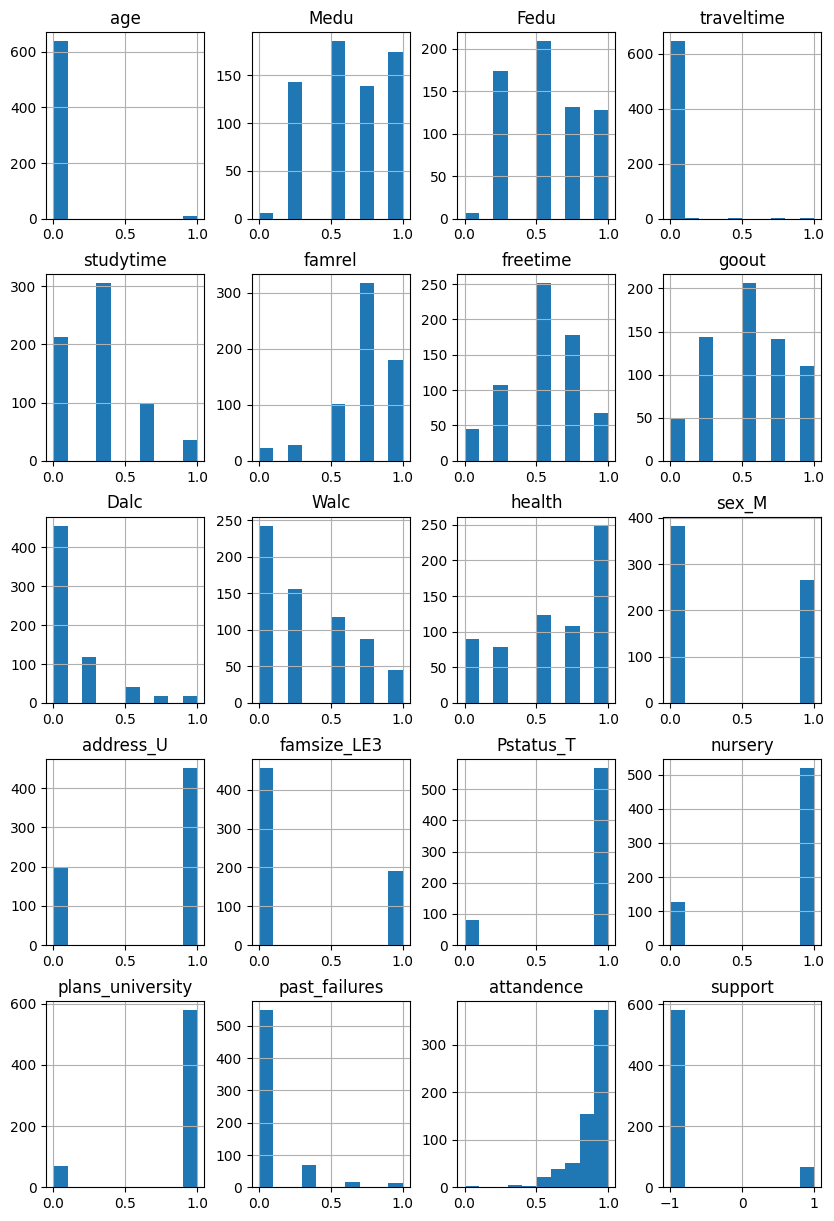

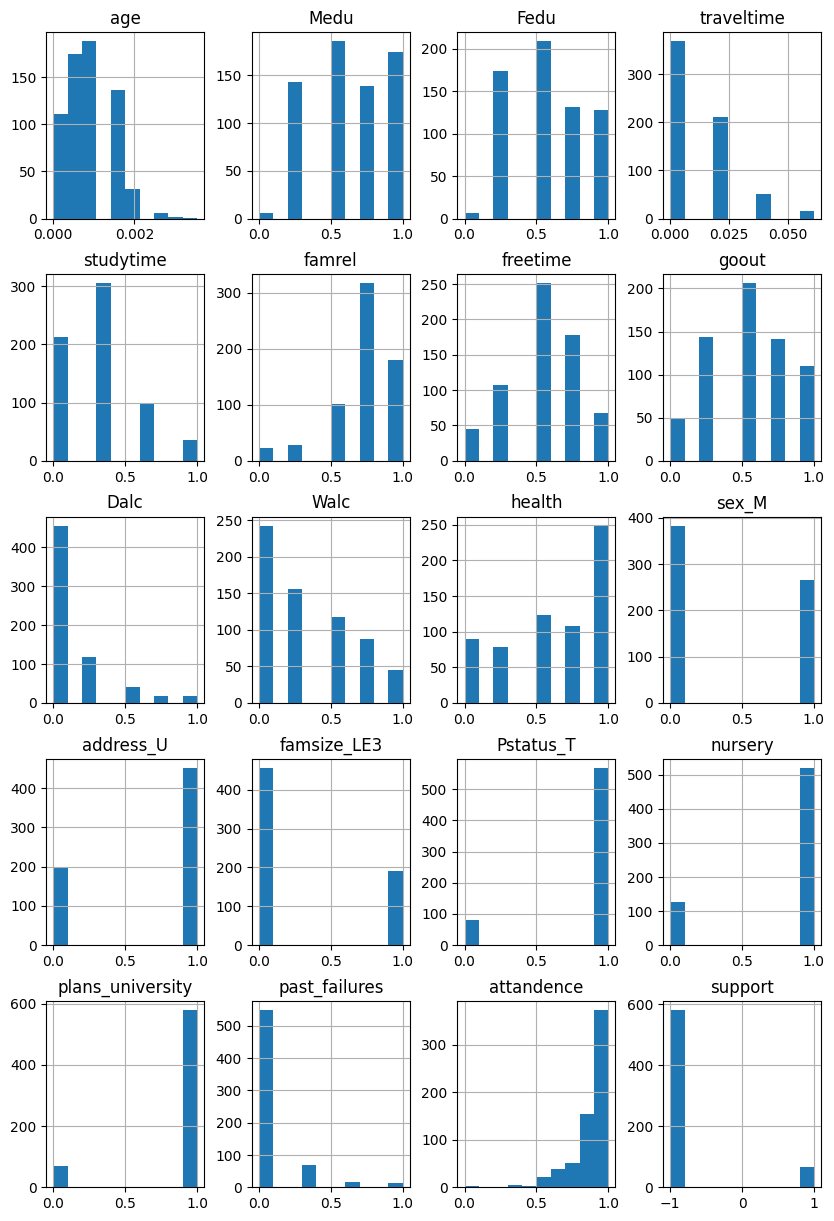

In [13]:
# Your code here
# ..
import pandas as pd
import matplotlib
import matplotlib.pyplot 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
df = pd.read_csv("full_data.csv")
hist = df.hist(figsize=(10,15))
df.loc[df['age'] > 0.1, 'age'] = df["age"].median()
df.loc[df['traveltime'] > 0.08, 'traveltime'] = df["traveltime"].median()
#>0/1 =   >100
#>=0.2=   >0.08
df.to_csv("without_ejection.csv", index=False)

df2 = pd.read_csv("without_ejection.csv")
hist = df2.hist(figsize=(10,15))

df_main = pd.read_csv("without_ejection.csv")
X = df_main.copy()  
y = pd.read_csv("scores.csv").squeeze()  

model = LinearRegression().fit(X, y)
predictions = model.predict(X)
scores = cross_val_score(model, X, y, cv=4, scoring='r2')
for i, score in enumerate(scores):
    print(f"Качество на {i+1}-м разбиении: {score:.4f}")

print(f"Среднее качество модели (по всем разбиениям): {scores.mean():.4f}")


__(1.5 балла)__

Другой простой способ найти выбросы &mdash; сделать предсказание и посчитать ошибку на каждом объекте по отдельности и посмотреть на объекты с наибольшей ошибкой. Обучите линейную регрессию (функция fit) и для каждого объекта посчитайте среднеквадратичное отклонение. Постройте гистограмму распределения ошибок. Посмотрите на гистограмму и удалите из выборки те объекты на которых ошибка слишком большая.

Обратите внимание, что просто удалять все объекты с высокой ошибкой нельзя &mdash; это, конечно, хороший способ добиться меньшей ошибки (на данной выборке), но одновременно вы ухудшите обобщающую способность алгоритма. Вместо этого вам нужно найти однозначно ошибочные записи и их исправить.

*Hint: возможно, все проблемы уже были найдены первым способом; для проверки &mdash; в сумме здесь нужно исправить 3 проблемы.*

Для поиска ошибки на одном отдельном обьекте придётся обучить линейную регрессию руками. Частичный пример, допишите код. Постройте гистограмму распределения ошибок

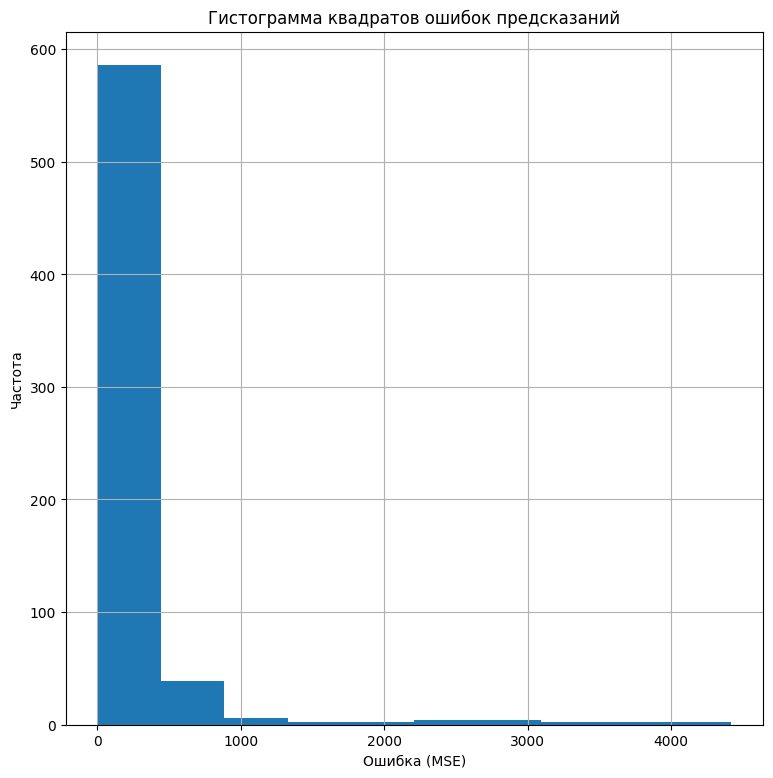

Качество на 1-м разбиении: 0.2726
Качество на 2-м разбиении: 0.2756
Качество на 3-м разбиении: 0.1284
Качество на 4-м разбиении: 0.2186
Среднее качество модели (по всем разбиениям): 0.2238
После удаления 29 объектов с наибольшей ошибкой:
Качество на 1-м разбиении: 0.3324
Качество на 2-м разбиении: 0.2800
Качество на 3-м разбиении: 0.3534
Качество на 4-м разбиении: 0.3038
Среднее качество модели (по всем разбиениям): 0.3174


In [14]:
import sklearn
from sklearn import linear_model
#prediction = #calculate prediction for one object for vector x
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

df_main = pd.read_csv("without_ejection.csv")
X = df_main.copy()  
y = pd.read_csv("scores.csv").squeeze()  

model = LinearRegression().fit(X, y)

predictions = model.predict(X)

scores = cross_val_score(model, X, y, cv=4, scoring='r2')

error = (predictions - y) ** 2

pd.Series(error).hist(figsize=(9, 9))
plt.xlabel("Ошибка (MSE)")
plt.ylabel("Частота")
plt.title("Гистограмма квадратов ошибок предсказаний")
plt.show()
for i, score in enumerate(scores):
    print(f"Качество на {i+1}-м разбиении: {score:.4f}")
cnt=0
print(f"Среднее качество модели (по всем разбиениям): {scores.mean():.4f}")
for i in range (len(error)):
    if(error[i]>750):
       X= X.drop(i)
       y=y.drop(i)
       cnt+=1
model = LinearRegression().fit(X, y)

print("После удаления ", end="")
print(cnt, end="")
print(" объектов с наибольшей ошибкой:")
scores = cross_val_score(model, X, y, cv=4, scoring='r2')
for i, score in enumerate(scores):
    print(f"Качество на {i+1}-м разбиении: {score:.4f}")
print(f"Среднее качество модели (по всем разбиениям): {scores.mean():.4f}")



### Финальное предсказание и отчёт (1 балл)

Проведите предсказание еще раз и сравните качество с исходным. Запишите свои наблюдения - как изменялось качество обучения модели при использовании разных модификаций данных. 

In [31]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
X = pd.read_csv("norm_data.csv")  
y = pd.read_csv("scores.csv").squeeze() 
model = LinearRegression()
scores = cross_val_score(model, X, y, cv=4, scoring='r2')
first=scores.mean()

X1 = pd.read_csv("full_data.csv")  
y1 = pd.read_csv("scores.csv").squeeze() 
model1 = LinearRegression()
scores1 = cross_val_score(model1, X1, y1, cv=4, scoring='r2')
second=scores1.mean()

df_main = pd.read_csv("without_ejection.csv")
X2 = df_main.copy()  
y2 = pd.read_csv("scores.csv").squeeze()  
model2 = LinearRegression().fit(X2, y2)
scores2 = cross_val_score(model2, X2, y2, cv=4, scoring='r2')
third=scores2.mean()

df_main = pd.read_csv("without_ejection.csv")
X4 = df_main.copy()  
y4 = pd.read_csv("scores.csv").squeeze()  

model4= LinearRegression().fit(X4, y4)

predictions = model4.predict(X4)

scores = cross_val_score(model4, X4, y4, cv=4, scoring='r2')

error = (predictions - y4) ** 2


for i in range (len(error)):
    if(error[i]>750):
       X4= X4.drop(i)
       y4=y4.drop(i)
       cnt+=1
model = LinearRegression().fit(X4, y4)


scores = cross_val_score(model4, X4, y4, cv=4, scoring='r2')
forth=scores.mean()
print(f"качество на полных данных по сравнению с исходными увеличлось на {second-first:.5f}") 
print(f"качетсво после борьбы с выбросами по сравнению с качеством на  полных данных увеличилось на {third-second:.5f}")

print(f"качетсво после исключения обьектов с наибольшей ошибкой увеличилось по сравнению с качеством на  полных данных без выбросов увеличилось на {forth - third:.5f}")
print(f"по абсолютному значению после обработки данных качество увеличилось на {forth - first:.5f}")

качество на полных данных по сравнению с исходными увеличлось на 0.00454
качетсво после борьбы с выбросами по сравнению с качеством на  полных данных увеличилось на 0.00632
качетсво после исключения обьектов с наибольшей ошибкой увеличилось по сравнению с качеством на  полных данных без выбросов увеличилось на 0.09359
по абсолютному значению после обработки данных качество увеличилось на 0.10445
